<a href="https://colab.research.google.com/github/amazon4b/Learning-Machine/blob/learner1/%EA%B2%BD%EA%B8%B0%EB%B6%84%EC%84%9D%2Ck_means(k%3D4)%2Cmeanshift%2C_minmax%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# 경고 메시지를 출력하지 않도록 설정
warnings.filterwarnings("ignore")

# 경고 메시지를 발생시키는 함수
def example_function():
    warnings.warn("이 함수는 예제일 뿐입니다.", UserWarning)

# 함수 호출
example_function()

In [2]:
# 기본패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans # 케이민즈 알고리즘
from sklearn.preprocessing import StandardScaler# 스텐다드 스케일러
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc

In [3]:
# 데이터프레임 불러오기
economics = pd.read_csv('./datasets/resampled_data_final.csv',encoding="euc-kr")
economics['DATE'] = pd.to_datetime(economics['DATE'])
economics['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 289 entries, 0 to 288
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [4]:
economics.drop(['장단기10년물국채/3개월금리차','신규실업수당청구','금융상태지수레버리지','제조업신규주문'],axis=1,inplace=True)

In [5]:
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,M2통화량,경기동행종합,산업생산지수,소매판매
287,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
economics = economics.iloc[:287 , ] # 결측치 제거
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,M2통화량,경기동행종합,산업생산지수,소매판매


In [7]:
# 2000년~2019년만 군집화하기 위함 , 코로나 데이터가 이상치로 잡히기 때문에 군집이 제대로 형성되지 않음
economics = economics.loc[economics['DATE'].dt.year <=2019 ]

In [8]:
# 주택가격지수. 제조업신규주문 , 경기동행종합지수는 차분하고 (변동치로 변경한다는 뜻)
# 제조업 신규주문은 앞으로 어떻게 처리할지 일단 보류
#M2와 소매판매는 변화율로 바꾸는 전처리 시행
economics.주택가격지수 = economics.주택가격지수.diff().fillna(method= 'bfill')
economics.경기동행종합 = economics.경기동행종합.diff().fillna(method= 'bfill')
economics['M2차분'] = economics.M2통화량.diff().fillna(method= 'bfill')
economics['M2변화율'] = economics.M2차분/ (economics.M2통화량.shift(1)) * 100
#economics['M2변화율'] .fillna(method = 'ffill')
economics['소매판매차분'] = economics.소매판매.diff().fillna(method='bfill')
economics['소매판매변화율'] = economics.소매판매차분/ (economics.소매판매.shift(1)) * 100


# 차분, 변화율 확인
economics[['M2통화량','M2차분','M2변화율','소매판매','소매판매차분','소매판매변화율']].head(10)
# 결측치를 다음날 데이터로 채워주기
economics['M2변화율'] = economics['M2변화율'].fillna(method = 'bfill')
economics['소매판매변화율'] = economics['소매판매변화율'].fillna(method = 'bfill')
# M2, 소매판매 원데이터를 지웠습니다.
economics.drop(['M2통화량','M2차분','소매판매','소매판매차분'],axis = 1,inplace = True)

In [9]:
# 다시 날짜를 인덱스로 설정해주기
economics = economics.set_index('DATE')

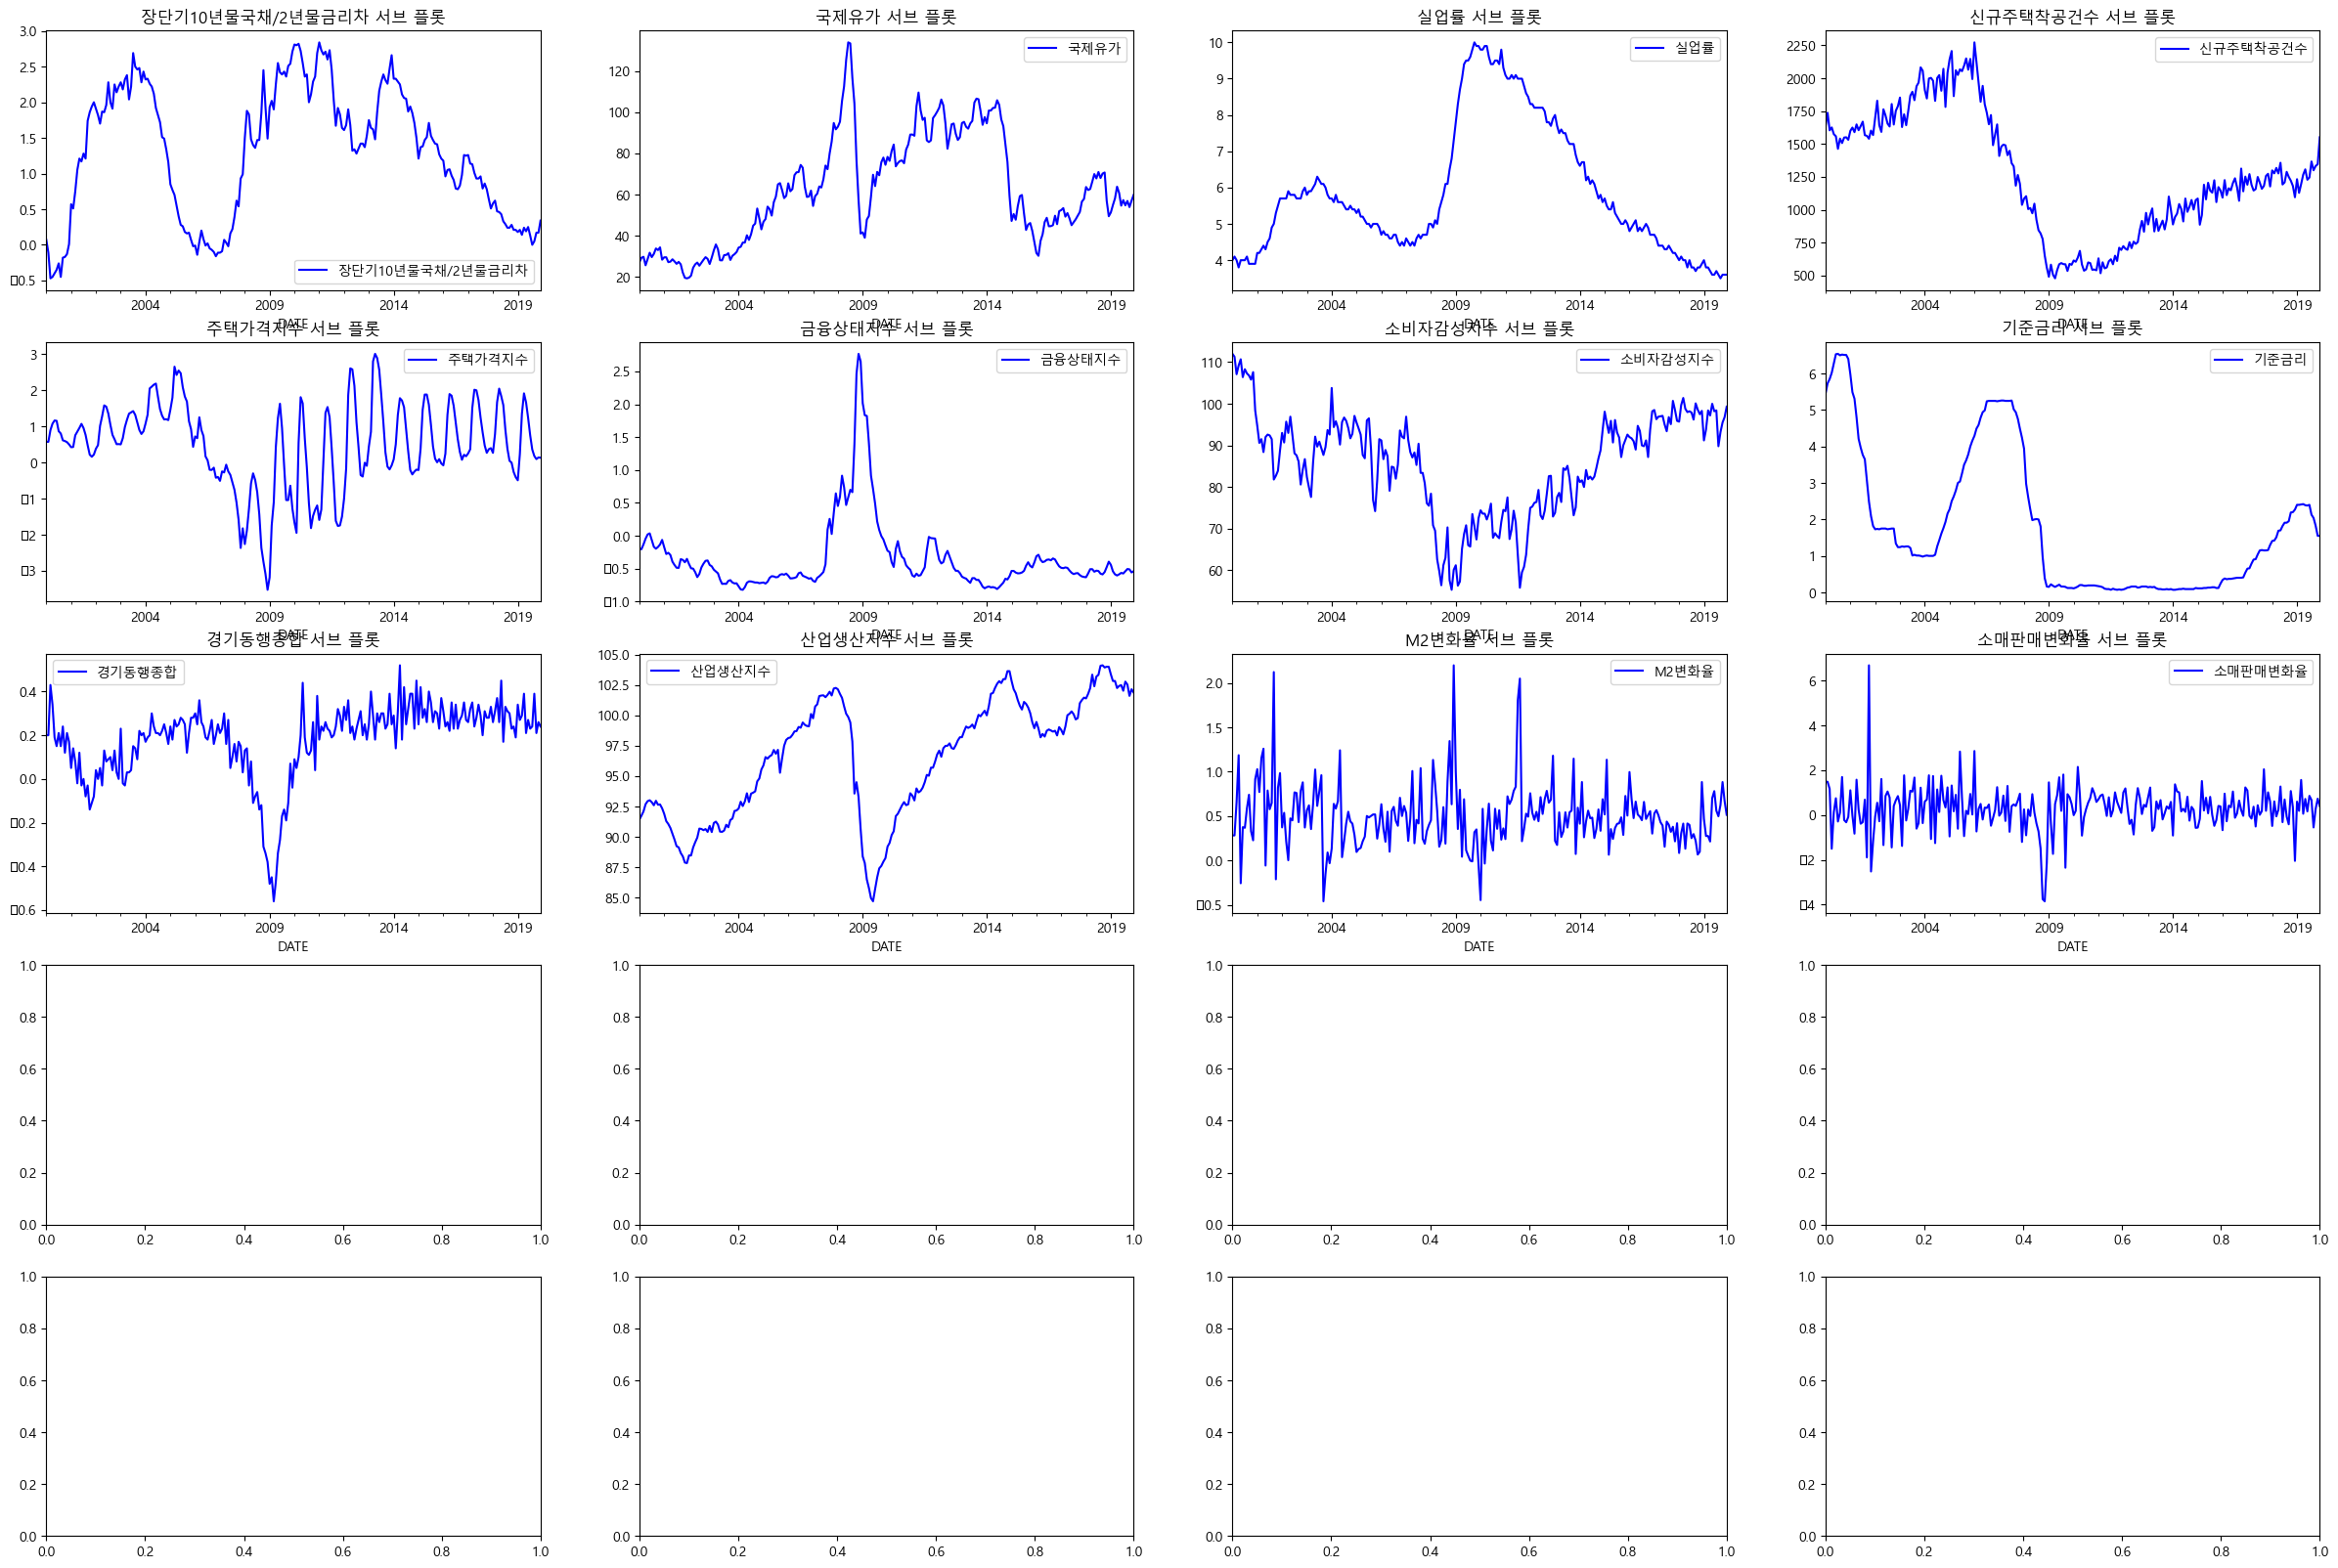

In [10]:
# 그래프 크기 조정
plt.rcParams['font.family'] ='Malgun Gothic'
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(economics.columns):
    economics.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

#### 스케일링

In [11]:
# 민멕스 스케일링
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(economics)

# 데이터 변환
mMscaled_data = mMscaler.transform(economics)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(data = mMscaled_data, index = economics.index , columns = economics.columns)

In [13]:
mMscaled_data

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,
2000-01-31,0.163142,0.068739,0.076923,0.645125,0.627085,0.175077,1.000000,0.831530,0.703704,0.346574,0.279060,0.506405
2000-02-29,0.108761,0.087142,0.092308,0.701393,0.627085,0.172010,0.987654,0.874807,0.703704,0.362563,0.279060,0.506405
2000-03-31,0.000000,0.091300,0.076923,0.627298,0.676664,0.192640,0.913580,0.893354,0.916667,0.380972,0.420244,0.476300
2000-04-30,0.006042,0.055314,0.046154,0.639554,0.704055,0.216616,0.950617,0.919629,0.833333,0.411371,0.619081,0.222681
2000-05-31,0.021148,0.082094,0.076923,0.611142,0.717521,0.234737,0.977072,0.958269,0.694444,0.424436,0.076356,0.377830
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.141994,0.309343,0.015385,0.495265,0.594644,0.078896,0.608466,0.318393,0.740741,0.930879,0.360217,0.429159
2019-09-30,0.157100,0.328043,0.000000,0.457939,0.566947,0.088096,0.668430,0.304482,0.879630,0.918323,0.408469,0.313010
2019-10-31,0.193353,0.301980,0.015385,0.475766,0.553940,0.086702,0.708995,0.272025,0.712963,0.870483,0.505253,0.391452


In [14]:
scale_2 =mMscaled_data.copy()

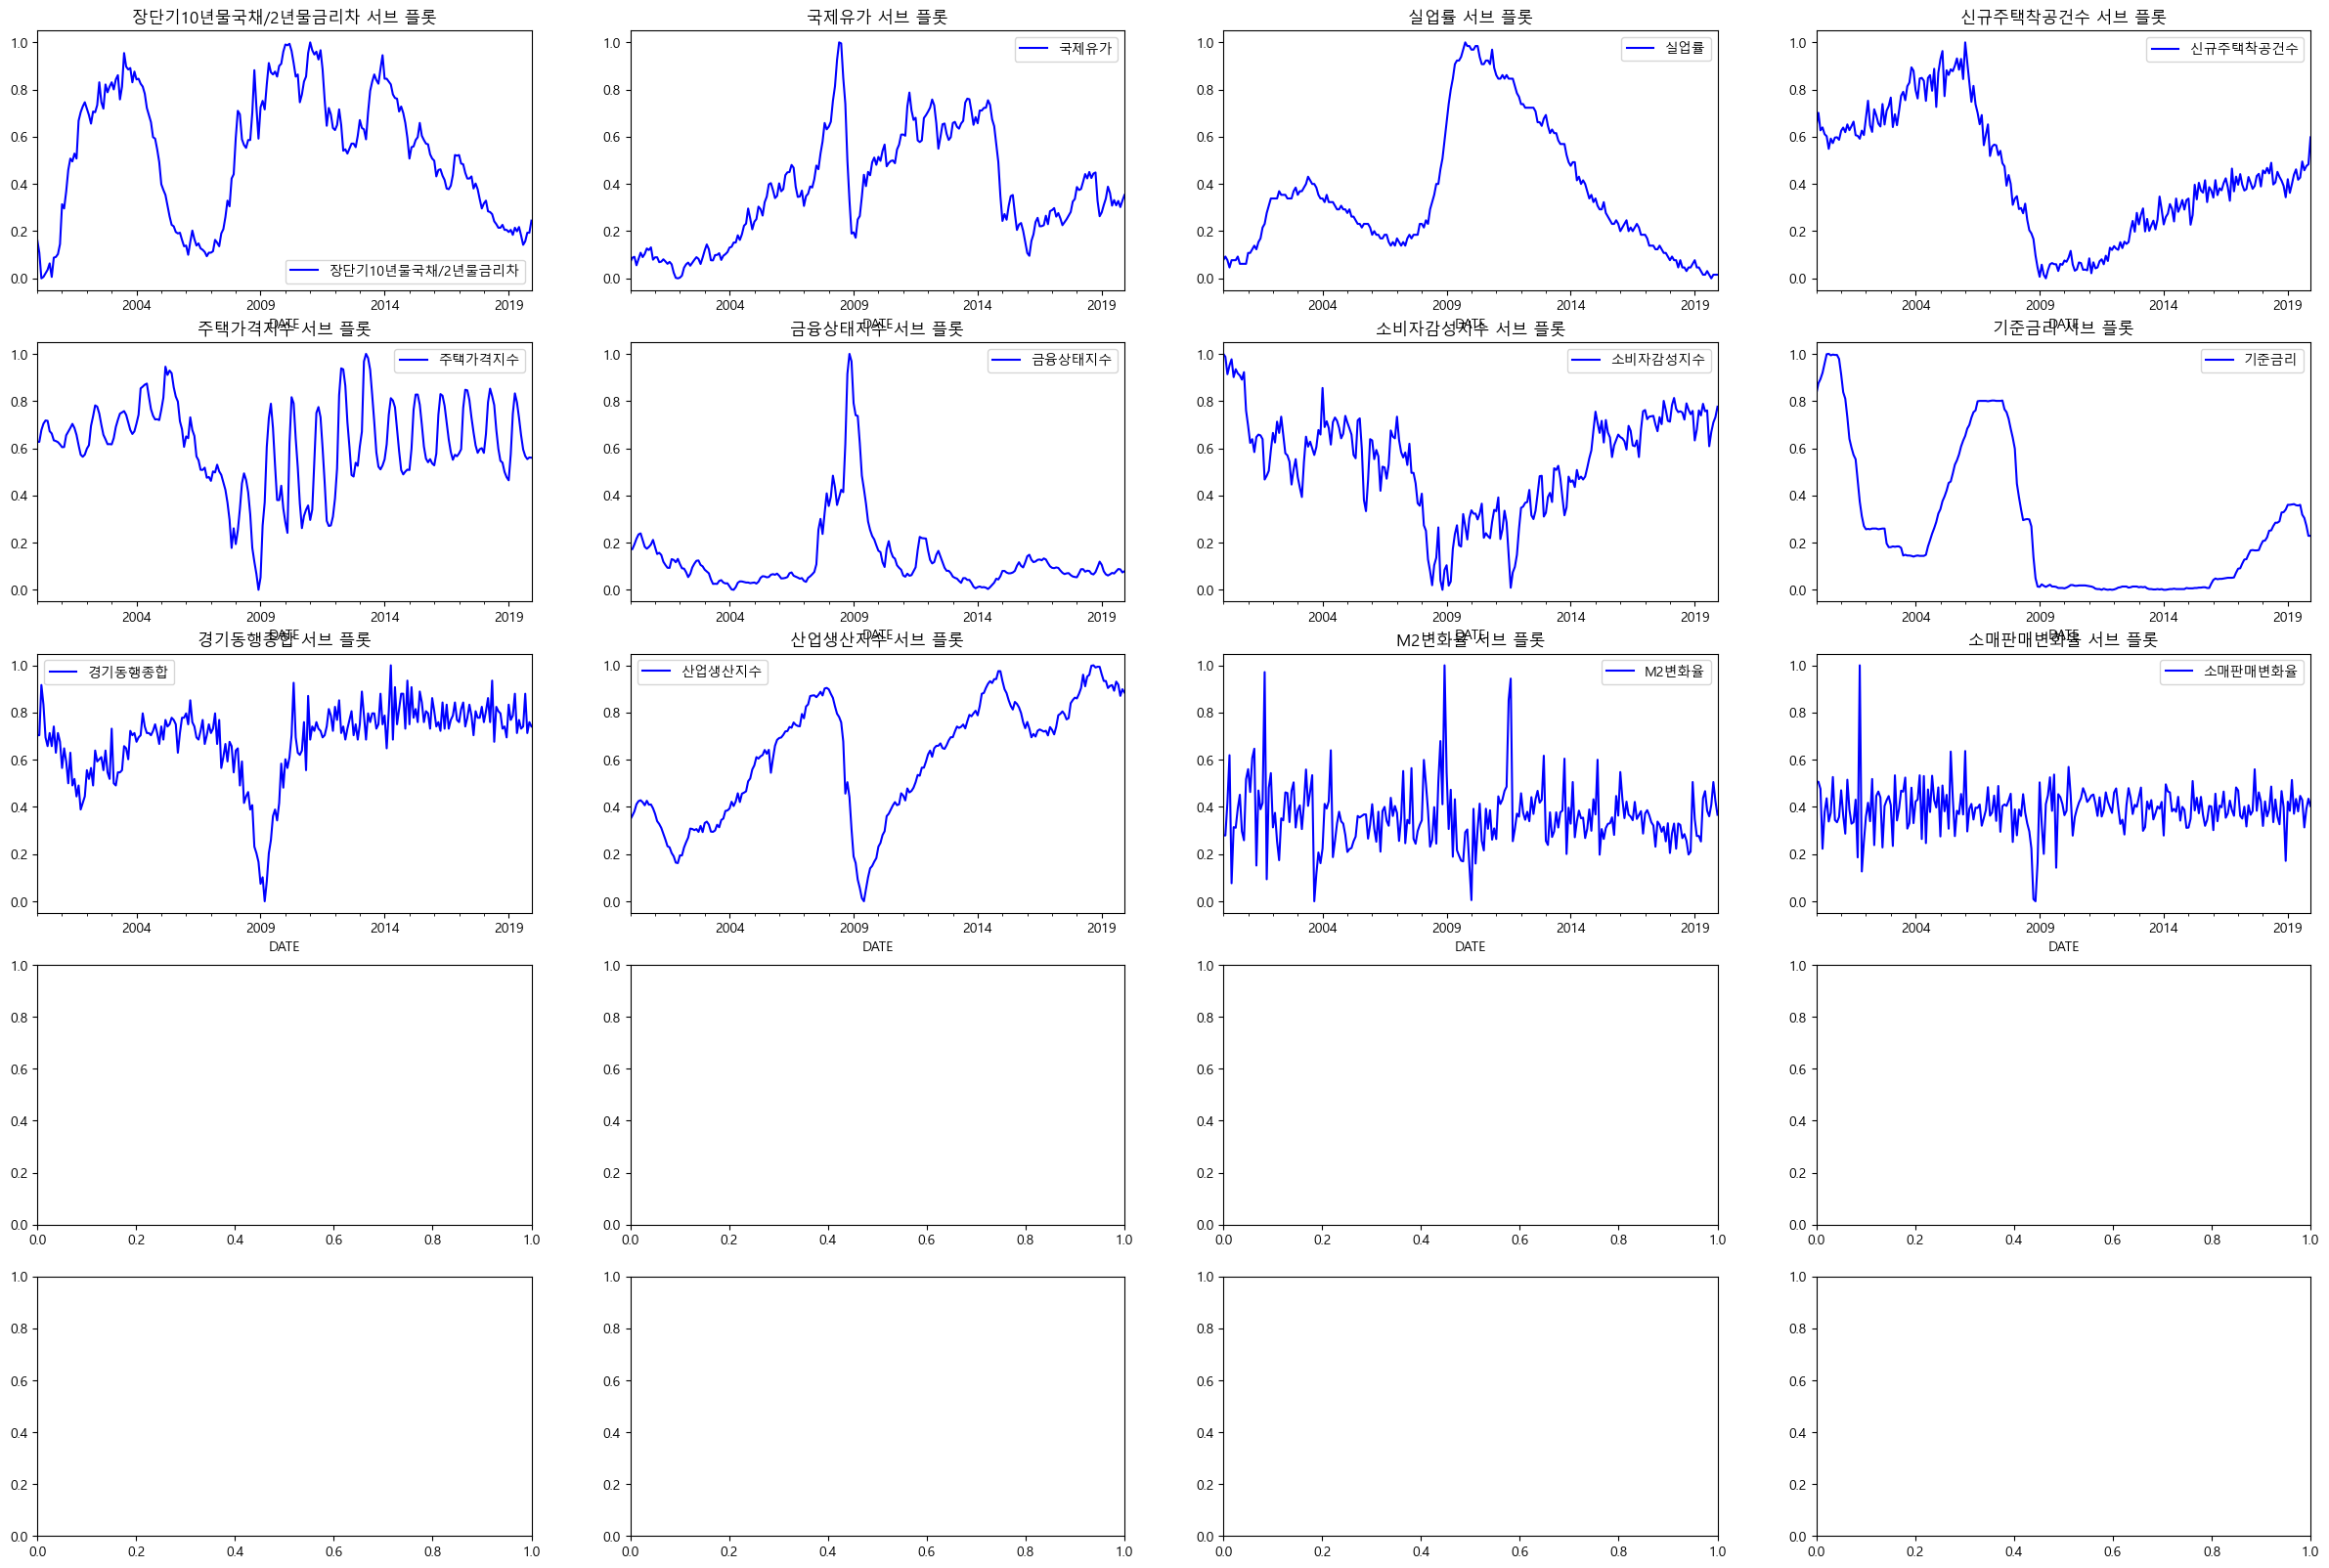

In [12]:
# 민멕스 스케일링한 데이터를 간단하게 시각화 해서 보기
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(mMscaled_data.columns):
    mMscaled_data.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

#### GaussianMixture

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D



In [14]:
from sklearn.mixture import GaussianMixture
from numpy import unique
from numpy import where

# define the model : n_components=3 (cluster 갯수)
gmm = GaussianMixture(n_components=5)

# train the model
gmm_label = gmm.fit(mMscaled_data).predict(mMscaled_data)

# assign each data point to a cluster
mMscaled_data['gmm_cluster'] = gmm_label

# get all of the unique clusters
gaussian_clusters = unique(mMscaled_data['gmm_cluster'])
print(gaussian_clusters)

mMscaled_data['gmm_cluster'].value_counts()

[0 1 2 3 4]


gmm_cluster
1    61
3    51
0    51
2    46
4    31
Name: count, dtype: int64

In [15]:
mMscaled_data.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율,gmm_cluster
DATE,,,,,,,,,,,,,
2000-01-31,0.16,0.07,0.08,0.65,0.63,0.18,1.00,0.83,0.70,0.35,0.28,0.51,3
2000-02-29,0.11,0.09,0.09,0.70,0.63,0.17,0.99,0.87,0.70,0.36,0.28,0.51,3
2000-03-31,0.00,0.09,0.08,0.63,0.68,0.19,0.91,0.89,0.92,0.38,0.42,0.48,3
2000-04-30,0.01,0.06,0.05,0.64,0.70,0.22,0.95,0.92,0.83,0.41,0.62,0.22,3
2000-05-31,0.02,0.08,0.08,0.61,0.72,0.23,0.98,0.96,0.69,0.42,0.08,0.38,3


In [16]:
mMscaled_data['gmm_cluster'].unique()

array([3, 2, 0, 4, 1], dtype=int64)

In [17]:
# 각 군집마다 해당되는 월의 개수를 표시해줍니다.
data_list = list(mMscaled_data['gmm_cluster'].value_counts())
for i, j  in enumerate(data_list) :
    print(f'{i}번째 클러스터 개수는 {j}개 입니다')

0번째 클러스터 개수는 61개 입니다
1번째 클러스터 개수는 51개 입니다
2번째 클러스터 개수는 51개 입니다
3번째 클러스터 개수는 46개 입니다
4번째 클러스터 개수는 31개 입니다


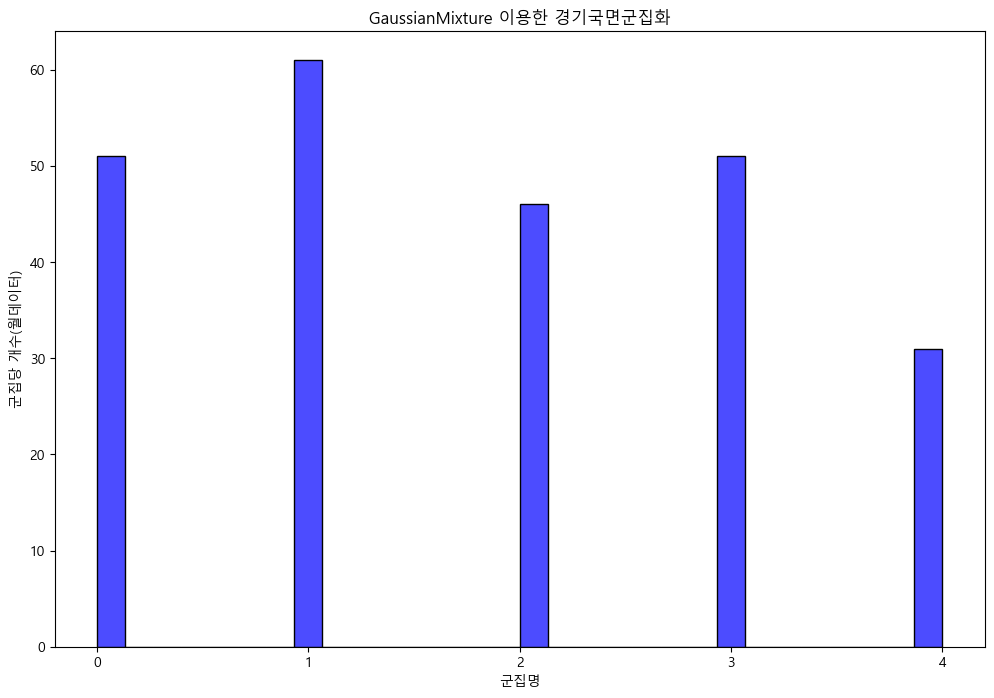

In [18]:
# k-means 군집화의 클러스터를 시각화
import matplotlib.ticker as ticker
# Seaborn 히스토그램 그리기
b=  mMscaled_data['gmm_cluster'].astype(int)


# Seaborn 히스토그램 그리기
plt.figure(figsize=(12, 8))
ax = sns.histplot(b, bins=30, kde=False, color='blue', alpha=0.7)

# x축 눈금을 정수로 바꾸는 함수
def format_func(value, tick_number):
    return int(value)

# x축 눈금에 함수 적용
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# 그래프 제목과 축 레이블 추가
plt.title('GaussianMixture 이용한 경기국면군집화')
plt.xlabel('군집명')
plt.ylabel('군집당 개수(월데이터)')

# 그래프 보이기
plt.show()

#### ANOVA

In [19]:
mMscaled_data['gmm_cluster'].unique()

array([3, 2, 0, 4, 1], dtype=int64)

In [27]:
cluster0 = mMscaled_data[mMscaled_data['gmm_cluster']==0]
cluster1 = mMscaled_data[mMscaled_data['gmm_cluster']==1]
cluster2 = mMscaled_data[mMscaled_data['gmm_cluster']==2]
cluster3 = mMscaled_data[mMscaled_data['gmm_cluster']==3]
cluster4 = mMscaled_data[mMscaled_data['gmm_cluster']==4]

In [21]:
mMscaled_data.columns

Index(['장단기10년물국채/2년물금리차', '국제유가', '실업률', '신규주택착공건수', '주택가격지수', '금융상태지수',
       '소비자감성지수', '기준금리', '경기동행종합', '산업생산지수', 'M2변화율', '소매판매변화율',
       'gmm_cluster'],
      dtype='object')

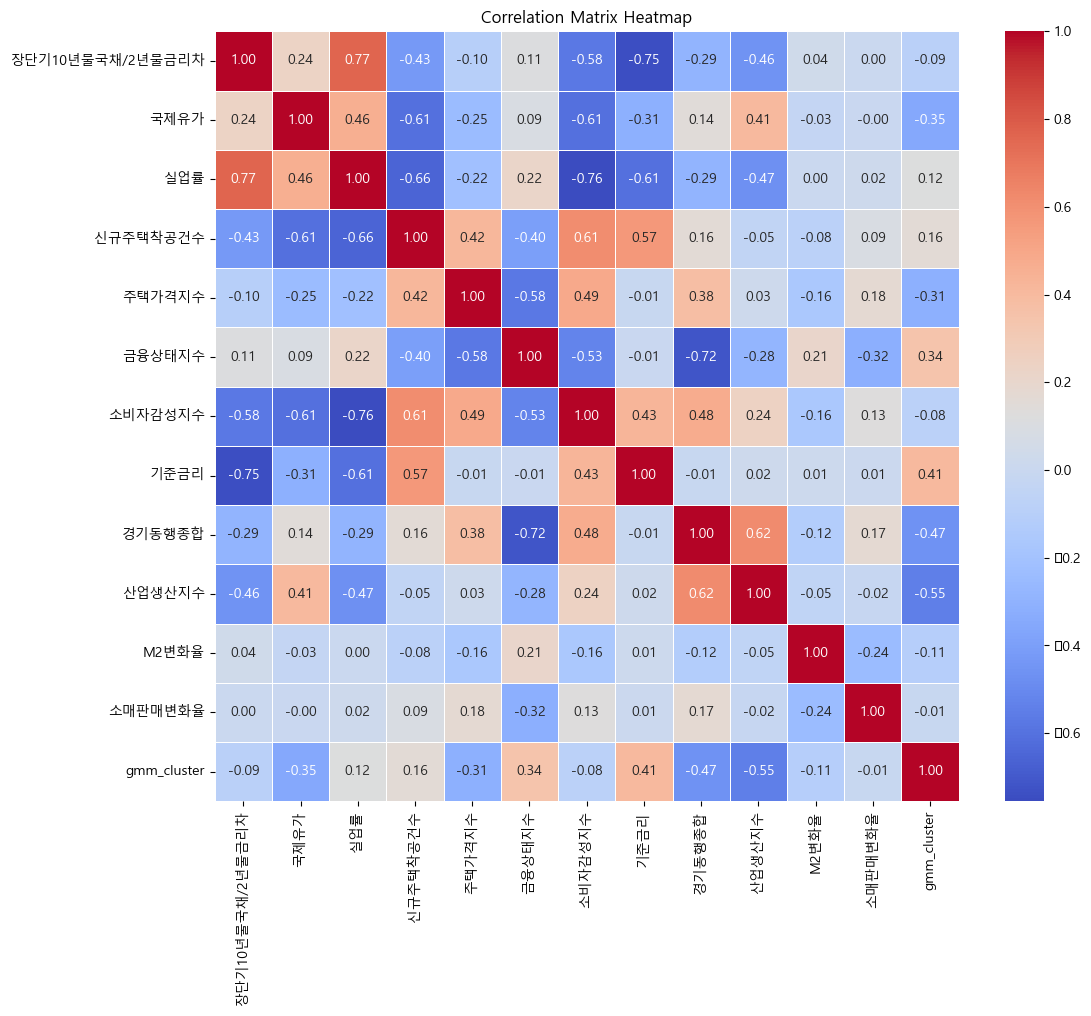

In [22]:
# 독립성 검정
import matplotlib.pyplot as plt
import seaborn as sns

# 상관 행렬 계산
correlation_matrix = mMscaled_data[mMscaled_data.columns].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
# 정규성 검정 (Shapiro-Wilk)
# 귀무가설 : 정규분포를 따른다
from scipy.stats import shapiro

# 클러스터별 feature에 대해 정규성 검정 수행
for cluster_num in range(4):  # 클러스터 번호는 0부터 3까지 총 4개
    cluster_data = mMscaled_data[mMscaled_data['gmm_cluster'] == cluster_num]
    
    print(f"\nCluster {cluster_num} - Shapiro-Wilk Test:")
    for column in cluster_data.columns:
        shapiro_test = shapiro(cluster_data[column])
        if shapiro_test.pvalue >= 0.05:
            print(f"{column} - p-value: {shapiro_test.pvalue}")


Cluster 0 - Shapiro-Wilk Test:
실업률 - p-value: 0.13926027715206146
주택가격지수 - p-value: 0.1827373057603836
산업생산지수 - p-value: 0.35707011818885803
소매판매변화율 - p-value: 0.1967388540506363
gmm_cluster - p-value: 1.0

Cluster 1 - Shapiro-Wilk Test:
국제유가 - p-value: 0.5230830907821655
신규주택착공건수 - p-value: 0.079179547727108
경기동행종합 - p-value: 0.12204970419406891
M2변화율 - p-value: 0.10355553776025772
소매판매변화율 - p-value: 0.14412900805473328
gmm_cluster - p-value: 1.0

Cluster 2 - Shapiro-Wilk Test:
신규주택착공건수 - p-value: 0.07675179094076157
주택가격지수 - p-value: 0.39661338925361633
소비자감성지수 - p-value: 0.14481614530086517
경기동행종합 - p-value: 0.06658770889043808
산업생산지수 - p-value: 0.11083292216062546
gmm_cluster - p-value: 1.0

Cluster 3 - Shapiro-Wilk Test:
신규주택착공건수 - p-value: 0.12600407004356384
주택가격지수 - p-value: 0.12698610126972198
경기동행종합 - p-value: 0.79534912109375
소매판매변화율 - p-value: 0.15656623244285583
gmm_cluster - p-value: 1.0


In [25]:
mMscaled_data2 = mMscaled_data[['실업률' ,'주택가격지수' ,'산업생산지수','소매판매변화율','국제유가' ,'신규주택착공건수','경기동행종합','M2변화율','소비자감성지수','gmm_cluster']]

In [30]:
cluster0 = mMscaled_data2[mMscaled_data2['gmm_cluster']==0]
cluster1 = mMscaled_data2[mMscaled_data2['gmm_cluster']==1]
cluster2 = mMscaled_data2[mMscaled_data2['gmm_cluster']==2]
cluster3 = mMscaled_data2[mMscaled_data2['gmm_cluster']==3]

In [31]:
# 등분산성 검정 - 바틀렛검정
# 귀무가설 : 등분산성의 특징이 있다
from scipy.stats import bartlett

# 등분산성 검정을 수행할 데이터프레임들
dataframes = [cluster0, cluster1, cluster2, cluster3]

# 각 데이터프레임에 대해 등분산성 검정 수행
for i, cluster_data in enumerate(dataframes):
    print(f"\nCluster {i} - Bartlett's Test:")
    for column in cluster_data.columns:
        # 등분산성 검정 수행
        bartlett_test = bartlett(*[dataframe[column] for dataframe in dataframes])
        if bartlett_test.pvalue >= 0.05:
            print(f"{column} - p-value: {bartlett_test.pvalue}")



Cluster 0 - Bartlett's Test:

Cluster 1 - Bartlett's Test:

Cluster 2 - Bartlett's Test:

Cluster 3 - Bartlett's Test:


독립성, 정규성, 등분산성 검정 후 ANOVA 수행

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.formula.api import ols

for col in cluster0.columns:
    F, p = stats.f_oneway(cluster0[col],
                    cluster1[col],
                    cluster2[col],
                    cluster3[col]
                    )
    # print(col)
    # print( 'F-Ratio: {}'.format(F)
    # , 'p-value:{}'.format(p)
    #  , sep = '\n')
    if p <= 0.05:
        print(f"{col} \n F-Ratio: {F} \n p-value: {p}")

실업률 
 F-Ratio: 166.68176110436883 
 p-value: 9.958216332804317e-55
주택가격지수 
 F-Ratio: 4.73148396250478 
 p-value: 0.0032540407460642205
산업생산지수 
 F-Ratio: 119.55124781360104 
 p-value: 8.678141362438419e-45
국제유가 
 F-Ratio: 234.68446847500311 
 p-value: 5.056801401034943e-66
신규주택착공건수 
 F-Ratio: 250.52189888998504 
 p-value: 2.7485360651234087e-68
경기동행종합 
 F-Ratio: 33.03184902994959 
 p-value: 1.84688412284503e-17
소비자감성지수 
 F-Ratio: 79.35956316431614 
 p-value: 4.138075170202721e-34
gmm_cluster 
 F-Ratio: inf 
 p-value: 0.0


In [33]:
# 가우시안 군집화 -> 아노바 수행 후 위의 피쳐들이 통계적으로 유의한 것으로 판단

In [43]:
# 위의 피쳐들이 유의미하게 나옴